In [18]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [19]:
df = pd.read_csv("breast-cancer.csv")
df = shuffle(df)
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
231,88199202,0,11.320,27.08,71.76,395.7,0.06883,0.03813,0.01633,0.003125,...,12.08,33.75,79.82,452.3,0.09203,0.1432,0.1089,0.02083,0.2849,0.07087
284,8912284,0,12.890,15.70,84.08,516.6,0.07818,0.09580,0.11150,0.033900,...,13.90,19.69,92.12,595.6,0.09926,0.2317,0.3344,0.10170,0.1999,0.07127
531,91903901,0,11.670,20.02,75.21,416.2,0.10160,0.09453,0.04200,0.021570,...,13.35,28.81,87.00,550.6,0.15500,0.2964,0.2758,0.08120,0.3206,0.08950
257,886776,1,15.320,17.27,103.20,713.3,0.13350,0.22840,0.24480,0.124200,...,17.73,22.66,119.80,928.8,0.17650,0.4503,0.4429,0.22290,0.3258,0.11910
163,8712064,0,12.340,22.22,79.85,464.5,0.10120,0.10150,0.05370,0.028220,...,13.58,28.68,87.36,553.0,0.14520,0.2338,0.1688,0.08194,0.2268,0.09082
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
258,887181,1,15.660,23.20,110.20,773.5,0.11090,0.31140,0.31760,0.137700,...,19.85,31.64,143.70,1226.0,0.15040,0.5172,0.6181,0.24620,0.3277,0.10190
54,857438,1,15.100,22.02,97.26,712.8,0.09056,0.07081,0.05253,0.033340,...,18.10,31.69,117.70,1030.0,0.13890,0.2057,0.2712,0.15300,0.2675,0.07873
439,909410,0,14.020,15.66,89.59,606.5,0.07966,0.05581,0.02087,0.026520,...,14.91,19.31,96.53,688.9,0.10340,0.1017,0.0626,0.08216,0.2136,0.06710
291,8915,0,14.960,19.10,97.03,687.3,0.08992,0.09823,0.05940,0.048190,...,16.25,26.19,109.10,809.8,0.13130,0.3030,0.1804,0.14890,0.2962,0.08472


In [20]:
df.shape

(569, 32)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 569 entries, 231 to 459
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    int64  
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave_points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se            

In [22]:
df.describe().round(2).transpose() # Diagnosis is about 37% Malignent

,count,mean,std,min,25%,50%,75%,max
id,569.0,30371831.43,1.250206e+08,8670.00,869218.00,906024.00,8813129.00,9.113205e+08
diagnosis,569.0,0.37,4.800000e-01,0.00,0.00,0.00,1.00,1.000000e+00
radius_mean,569.0,14.13,3.520000e+00,6.98,11.70,13.37,15.78,2.811000e+01
texture_mean,569.0,19.29,4.300000e+00,9.71,16.17,18.84,21.80,3.928000e+01
perimeter_mean,569.0,91.97,2.430000e+01,43.79,75.17,86.24,104.10,1.885000e+02
area_mean,569.0,654.89,3.519100e+02,143.50,420.30,551.10,782.70,2.501000e+03
smoothness_mean,569.0,0.10,1.000000e-02,0.05,0.09,0.10,0.11,1.600000e-01
compactness_mean,569.0,0.10,5.000000e-02,0.02,0.06,0.09,0.13,3.500000e-01
concavity_mean,569.0,0.09,8.000000e-02,0.00,0.03,0.06,0.13,4.300000e-01
concave_points_mean,569.0,0.05,4.000000e-02,0.00,0.02,0.03,0.07,2.000000e-01


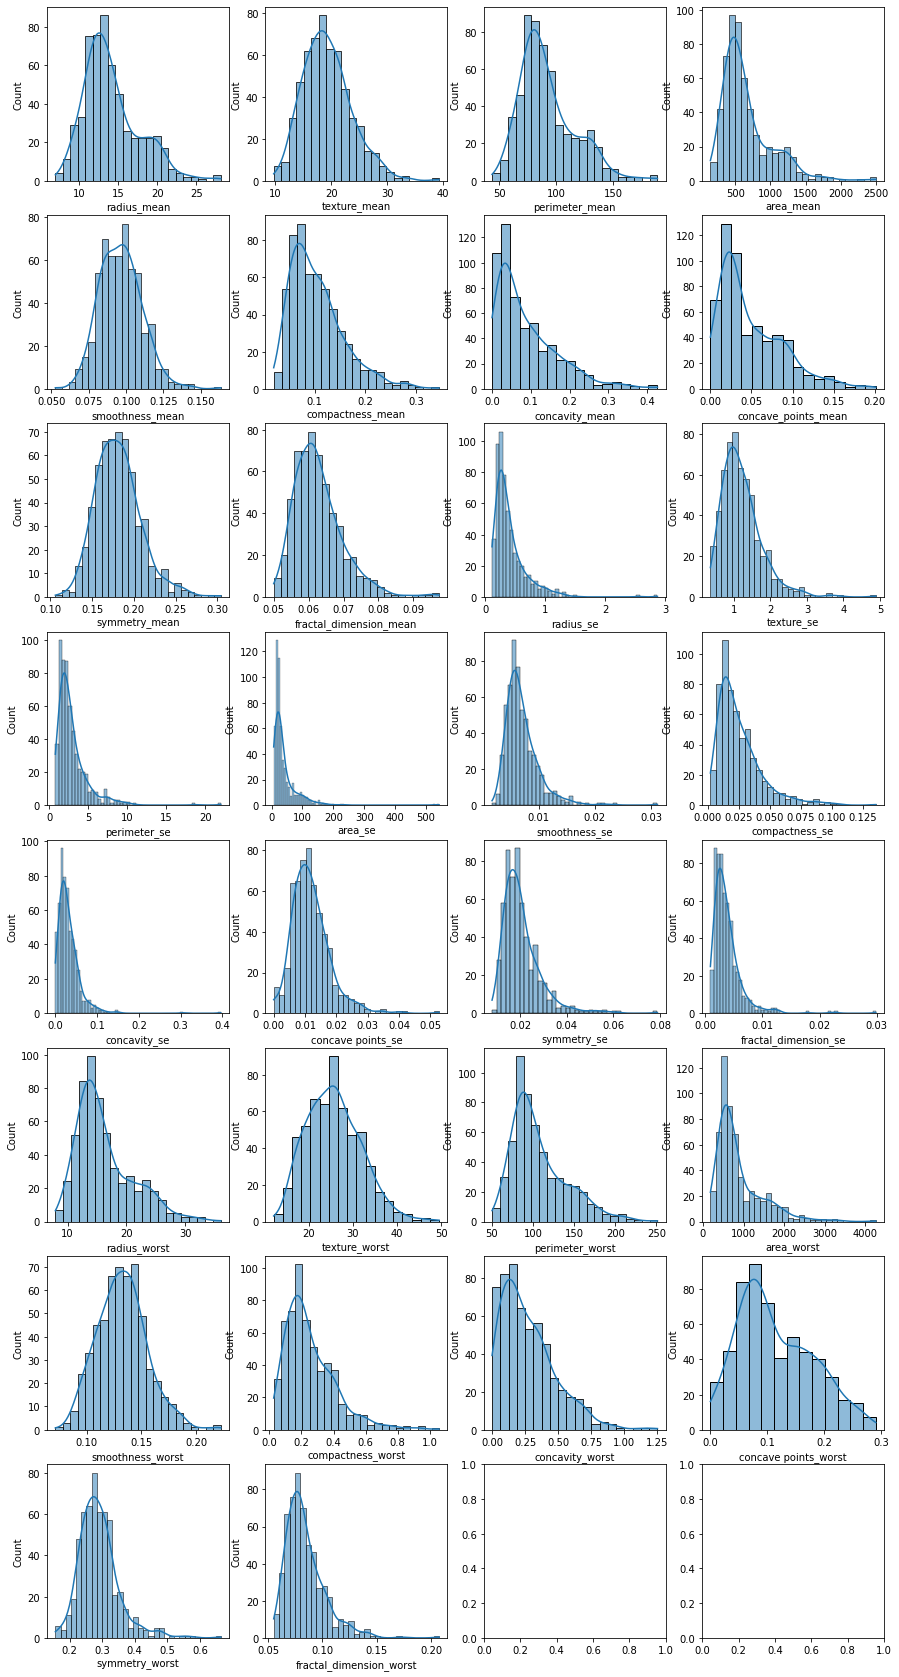

In [23]:
# select the columns to be plotted
cols = df.iloc[:,2:]

# create the figure and axes
fig, axes = plt.subplots(8, 4)
fig.set_size_inches(15, 30)  # ( x , y )
axes = axes.ravel()  # flattening the array makes indexing easier
for col, ax in zip(cols, axes):
    sns.histplot(data=df[col], kde=True, ax = ax)

plt.show()

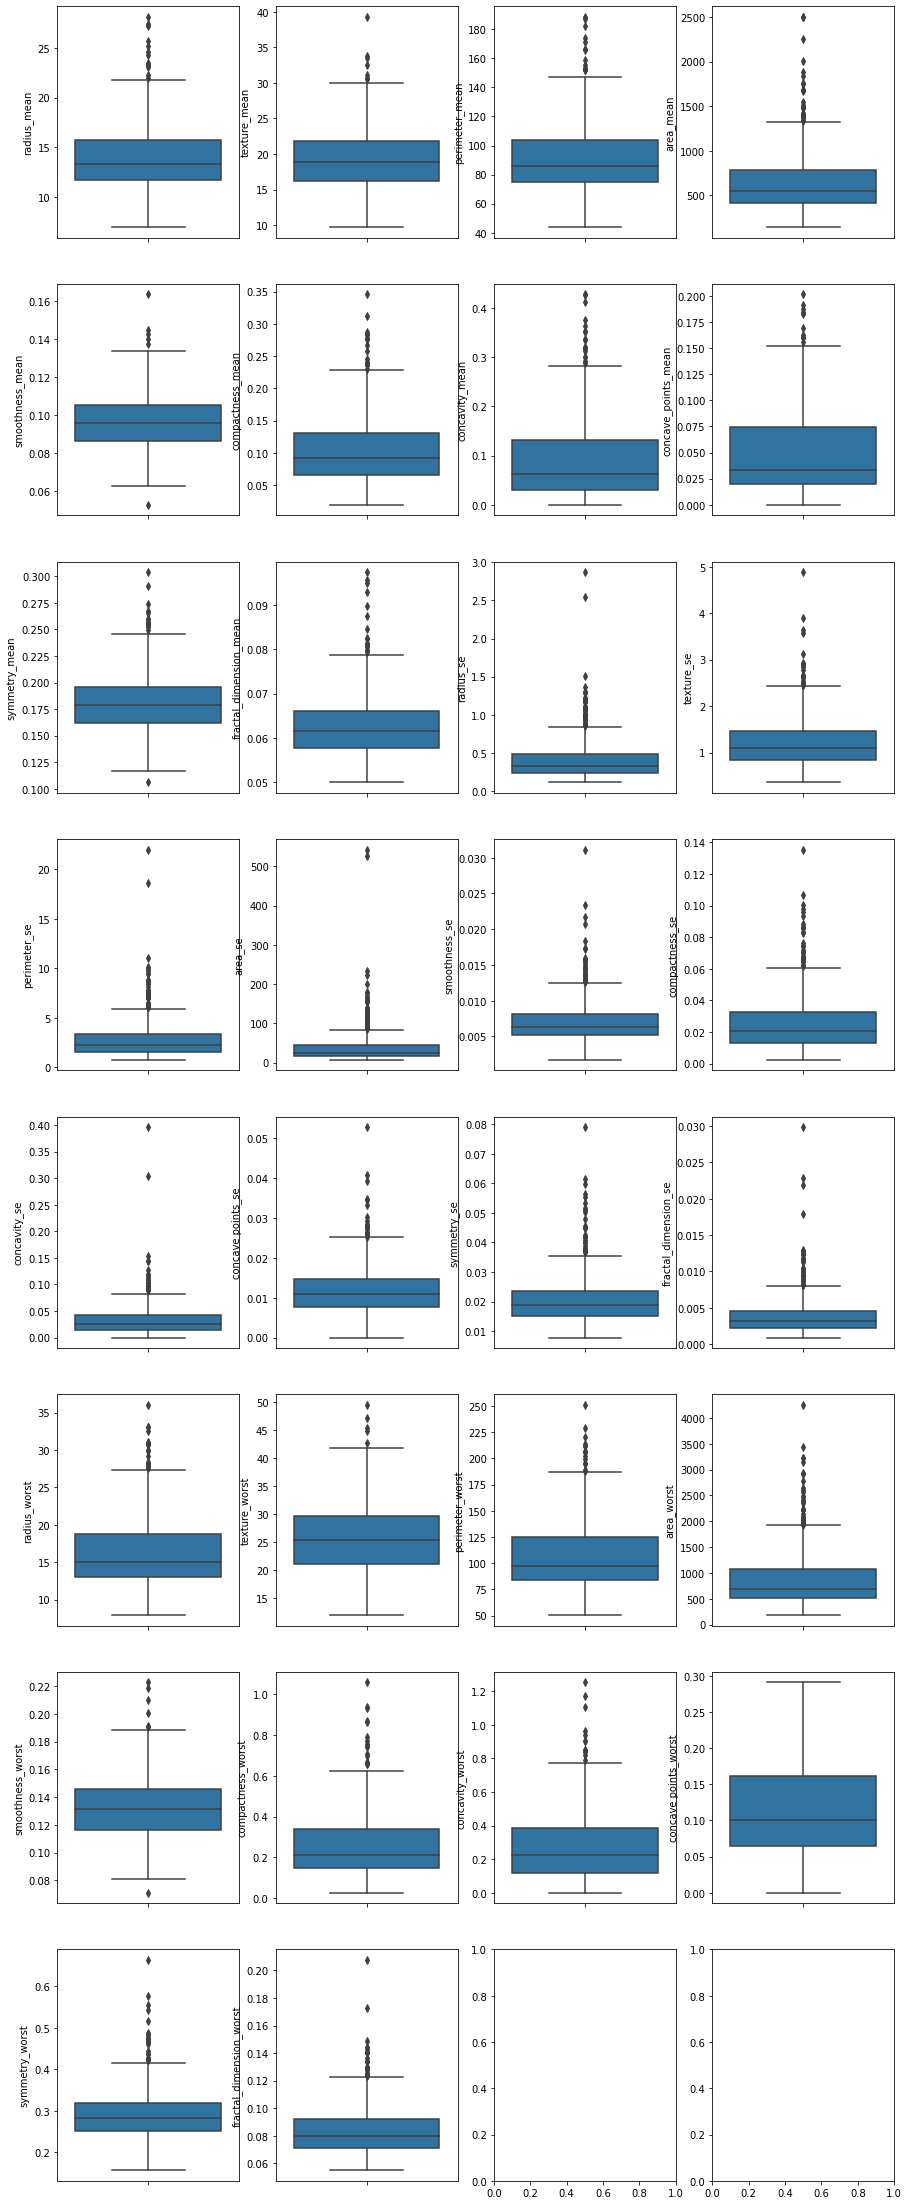

In [24]:
# select the columns to be plotted
cols = df.iloc[:,2:]

# create the figure and axes
fig, axes = plt.subplots(8, 4)
axes = axes.ravel()  # flattening the array makes indexing easier
fig.set_size_inches(15, 40)  # ( x , y )
for col, ax in zip(cols, axes):
    sns.boxplot(ax =ax,y=df[col])

plt.show()

In [25]:
# Calculate IQR
q75, q25 = np.percentile(df['area_worst'], [75 ,25])
IQR = q75 - q25

# Calculate lower and upper bounds
lower_bound = q25 - (IQR * 1.5)
upper_bound = q75 + (IQR * 1.5)

# Select rows that are outside the bounds
df_outliers = df.query('area_worst < @lower_bound or area_worst > @upper_bound')
df_outliers # 35 outliers

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
219,88119002,1,19.53,32.47,128.0,1223.0,0.08420,0.11300,0.1145,0.06637,...,27.90,45.41,180.2,2477.0,0.1408,0.4097,0.3995,0.1625,0.2713,0.07568
339,89812,1,23.51,24.27,155.1,1747.0,0.10690,0.12830,0.2308,0.14100,...,30.67,30.73,202.4,2906.0,0.1515,0.2678,0.4819,0.2089,0.2593,0.07738
265,88995002,1,20.73,31.12,135.7,1419.0,0.09469,0.11430,0.1367,0.08646,...,32.49,47.16,214.0,3432.0,0.1401,0.2644,0.3442,0.1659,0.2868,0.08218
369,9012000,1,22.01,21.90,147.2,1482.0,0.10630,0.19540,0.2448,0.15010,...,27.66,25.80,195.0,2227.0,0.1294,0.3885,0.4756,0.2432,0.2741,0.08574
202,878796,1,23.29,26.67,158.9,1685.0,0.11410,0.20840,0.3523,0.16200,...,25.12,32.68,177.0,1986.0,0.1536,0.4167,0.7892,0.2733,0.3198,0.08762
449,911157302,1,21.10,20.52,138.1,1384.0,0.09684,0.11750,0.1572,0.11550,...,25.68,32.07,168.2,2022.0,0.1368,0.3101,0.4399,0.2280,0.2268,0.07425
323,895100,1,20.34,21.51,135.9,1264.0,0.11700,0.18750,0.2565,0.15040,...,25.30,31.86,171.1,1938.0,0.1592,0.4492,0.5344,0.2685,0.5558,0.10240
23,851509,1,21.16,23.04,137.2,1404.0,0.09428,0.10220,0.1097,0.08632,...,29.17,35.59,188.0,2615.0,0.1401,0.2600,0.3155,0.2009,0.2822,0.07526
503,915143,1,23.09,19.83,152.1,1682.0,0.09342,0.12750,0.1676,0.10030,...,30.79,23.87,211.5,2782.0,0.1199,0.3625,0.3794,0.2264,0.2908,0.07277
82,8611555,1,25.22,24.91,171.5,1878.0,0.10630,0.26650,0.3339,0.18450,...,30.00,33.62,211.7,2562.0,0.1573,0.6076,0.6476,0.2867,0.2355,0.10510


In [26]:
# Remove Outliers, Copy orig df before 
df_outliers = df.copy()
for i in df_outliers:
    q75, q25 = np.percentile(df.loc[:,i],[75,25])
    IQR = q75 - q25
    max = q75 + 1.5*IQR
    min = q25 - 1.5*IQR
    df.loc[df_outliers[i] > max, i] = df_outliers[i].mean()
    df.loc[df_outliers[i] < min, i] = df_outliers[i].mean()

In [27]:
cor = df.corr().round(2)
cor.sort_values(['diagnosis'],ascending=False,inplace=True)
cor.diagnosis

diagnosis                  1.00
concave points_worst       0.79
perimeter_worst            0.79
radius_worst               0.78
concave_points_mean        0.78
area_worst                 0.76
perimeter_mean             0.74
concavity_mean             0.74
area_mean                  0.72
radius_mean                0.72
area_se                    0.68
concavity_worst            0.68
radius_se                  0.58
compactness_worst          0.58
perimeter_se               0.58
compactness_mean           0.57
concave points_se          0.46
texture_worst              0.44
concavity_se               0.44
smoothness_worst           0.42
texture_mean               0.41
smoothness_mean            0.37
compactness_se             0.36
symmetry_worst             0.35
symmetry_mean              0.33
fractal_dimension_worst    0.29
fractal_dimension_se       0.19
id                         0.07
texture_se                 0.01
fractal_dimension_mean    -0.00
smoothness_se             -0.02
symmetry

In [28]:
cor2 = df_outliers.corr().round(2)
cor2.sort_values(['diagnosis'],ascending=False,inplace=True)
cor2.diagnosis

diagnosis                  1.00
concave points_worst       0.79
perimeter_worst            0.78
concave_points_mean        0.78
radius_worst               0.78
perimeter_mean             0.74
radius_mean                0.73
area_worst                 0.73
area_mean                  0.71
concavity_mean             0.70
concavity_worst            0.66
compactness_mean           0.60
compactness_worst          0.59
radius_se                  0.57
perimeter_se               0.56
area_se                    0.55
texture_worst              0.46
smoothness_worst           0.42
symmetry_worst             0.42
texture_mean               0.42
concave points_se          0.41
smoothness_mean            0.36
symmetry_mean              0.33
fractal_dimension_worst    0.32
compactness_se             0.29
concavity_se               0.25
fractal_dimension_se       0.08
id                         0.04
symmetry_se               -0.01
texture_se                -0.01
fractal_dimension_mean    -0.01
smoothne

## Modeling

In [29]:
model_features =   df.loc[:,['perimeter_worst','radius_worst','concave_points_mean',
                'area_worst','perimeter_mean','area_mean','radius_mean',
                'radius_mean','area_se','concavity_worst','radius_se', 'compactness_worst',
                'perimeter_se','compactness_mean' ]]

model_features_outliers  =   df_outliers.loc[:,['perimeter_worst','radius_worst','concave_points_mean',
                    'area_worst','perimeter_mean','area_mean','radius_mean',
                    'radius_mean','area_se','concavity_worst','radius_se', 'compactness_worst',
                    'perimeter_se','compactness_mean' ]]

# X = model_features.values
X = model_features.values
y = df['diagnosis']

X_train, X_test, y_train, y_test = train_test_split(X,y)

In [30]:
if isinstance(X_train, pd.DataFrame):
    print('DType:\nX_train:{}, y_train:{}\nShape:\nX_train:{}, y_train:{}\nType:\nX_train:{}, y_train{}'
          .format(type(X_train),type(y_train),X_train.shape,y_train.shape,type(X_train),type(y_train)))
else:
    print('DType:\nX_train:{}, y_train:{}\nShape:\nX_train:{}, y_train:{}\nType:\nX_train:{}, y_train{}'
        .format(X_train.dtype,y_train.dtype,X_train.shape,y_train.shape,type(X_train),type(y_train)))
       

DType:
X_train:float64, y_train:float64
Shape:
X_train:(426, 14), y_train:(426,)
Type:
X_train:<class 'numpy.ndarray'>, y_train<class 'pandas.core.series.Series'>


### Logistic Regression

In [31]:
# Model Original
lgreg = LogisticRegression(max_iter=10000)
lgreg.fit(X_train, y_train)
y_pred = lgreg.predict(X_test)

In [32]:
# Metrics
cm = confusion_matrix(y_test,y_pred)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.95      0.95      0.95        88
         1.0       0.93      0.93      0.93        55

    accuracy                           0.94       143
   macro avg       0.94      0.94      0.94       143
weighted avg       0.94      0.94      0.94       143



<AxesSubplot:>

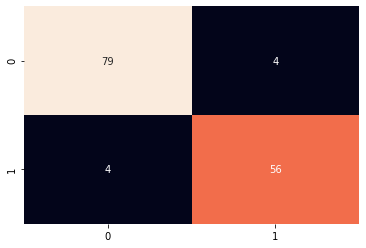

In [17]:
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm, annot=True, cbar=False)

### KNN

In [61]:
# Model Original Data
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

In [62]:
# Metrics
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.98      0.93      0.95        90
         1.0       0.89      0.96      0.93        53

    accuracy                           0.94       143
   macro avg       0.94      0.95      0.94       143
weighted avg       0.95      0.94      0.94       143



<AxesSubplot: >

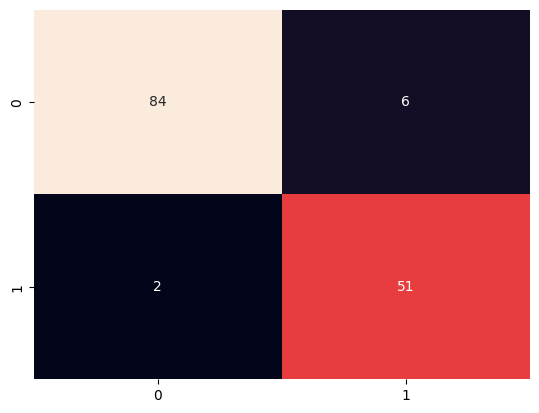

In [63]:
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm, annot=True, cbar=False)

### Linear SVM (kernel = linear)

In [64]:
svm_linear = SVC(kernel='linear')
svm_linear.fit(X_train, y_train)
y_pred = svm_linear.predict(X_test)

In [65]:
# Metrics
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.92      0.94      0.93        90
         1.0       0.90      0.87      0.88        53

    accuracy                           0.92       143
   macro avg       0.91      0.91      0.91       143
weighted avg       0.92      0.92      0.92       143



<AxesSubplot: >

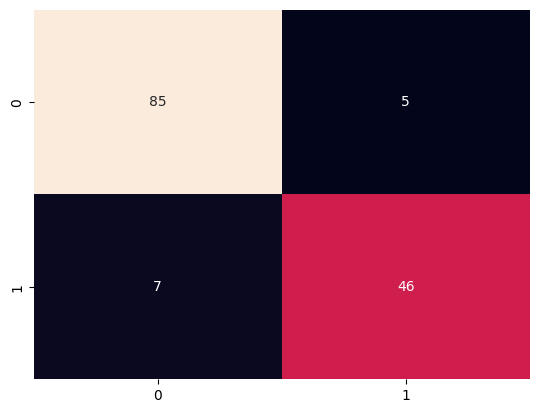

In [66]:
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm, annot=True, cbar=False)

### Linear SVM (kernel = rbf)

In [67]:
svm = SVC()
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)

In [68]:
# Metrics
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.93      0.93      0.93        90
         1.0       0.89      0.89      0.89        53

    accuracy                           0.92       143
   macro avg       0.91      0.91      0.91       143
weighted avg       0.92      0.92      0.92       143



<AxesSubplot: >

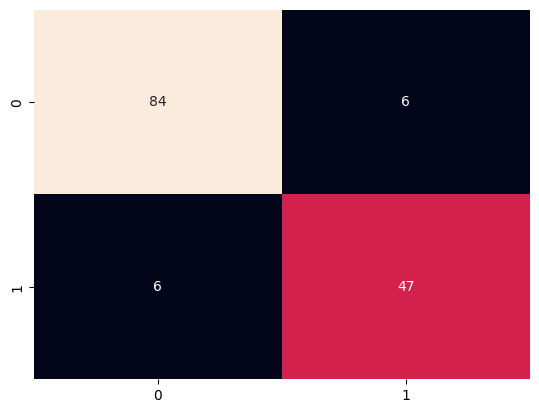

In [69]:
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm, annot=True, cbar=False)

### Naive Bayes

In [70]:
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)

In [71]:
# Metrics
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.96      0.88      0.92        90
         1.0       0.82      0.94      0.88        53

    accuracy                           0.90       143
   macro avg       0.89      0.91      0.90       143
weighted avg       0.91      0.90      0.90       143



<AxesSubplot: >

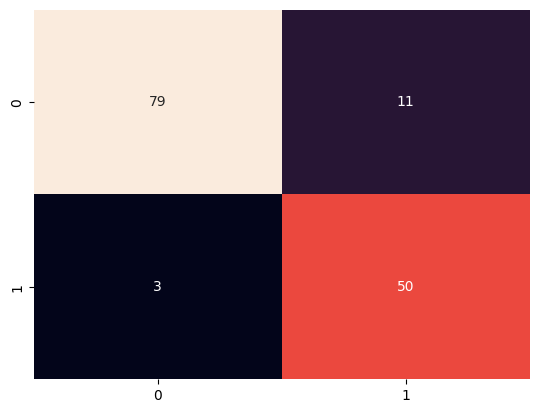

In [72]:
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm, annot=True, cbar=False)

### Decision Tree

In [73]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

In [74]:
# Metrics
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.95      0.91      0.93        90
         1.0       0.86      0.92      0.89        53

    accuracy                           0.92       143
   macro avg       0.91      0.92      0.91       143
weighted avg       0.92      0.92      0.92       143



<AxesSubplot: >

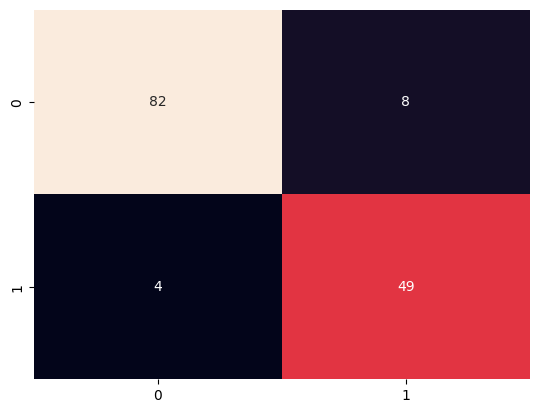

In [75]:
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm, annot=True, cbar=False)

### Random Forest (estimators = 10)

In [76]:
rf = RandomForestClassifier(n_estimators=10)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

In [77]:
# Metrics
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.96      0.94      0.95        90
         1.0       0.91      0.92      0.92        53

    accuracy                           0.94       143
   macro avg       0.93      0.93      0.93       143
weighted avg       0.94      0.94      0.94       143



<AxesSubplot: >

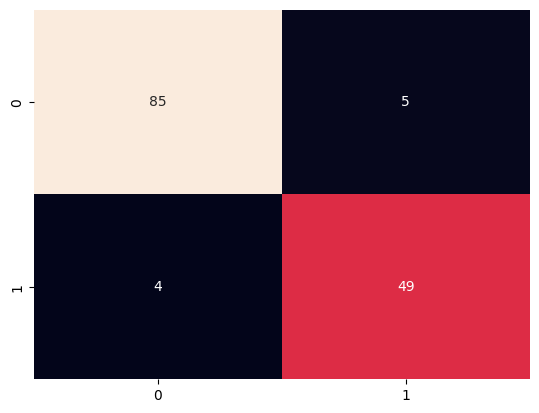

In [78]:
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm, annot=True, cbar=False)

### XGBoost

In [79]:
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)

In [80]:
# Metrics
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.95      0.98      0.96        90
         1.0       0.96      0.91      0.93        53

    accuracy                           0.95       143
   macro avg       0.95      0.94      0.95       143
weighted avg       0.95      0.95      0.95       143



<AxesSubplot: >

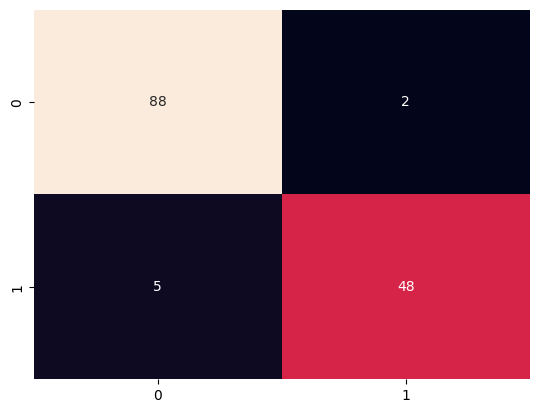

In [81]:
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm, annot=True, cbar=False)